Question 1:

In [125]:
#set up the data for the file and declare the average variable
data = [("math", 85), ("science", 92), ("english", 78), ("history", 88), ("art", 95)]
average_grade = 0
#make the file, add the name and data, make average_grade the total
with open('my_grades.txt','w') as file:
  file.write("Aahil Hasan"+"\n")
  for entry in data:
    file.write(str(entry[0]) + ": " + str(entry[1]) + '\n')
    average_grade += entry[1]
file.close()
#read file
with open('my_grades.txt', 'r') as file:
    content = file.read()
    print(content)
#make average_grade the average and print it
average_grade /= len(data)

print("Average Grade: " + str(average_grade))



Aahil Hasan
math: 85
science: 92
english: 78
history: 88
art: 95

Average Grade: 87.6


Question 2:

In [126]:
#make the student class, initialize its properties, and define its functions
class Student:
    def __init__(self, name, age, grades):
        self.name = name
        self.age = age
        self.grades = grades

    def get_average(self):
        return sum(self.grades) / len(self.grades)

    def add_grade(self, grade):
        self.grades.append(grade)

    def get_letter_grade(self):
        avg = self.get_average()
        if avg >= 90: return 'A'
        elif avg >= 80: return 'B'
        elif avg >= 70: return 'C'
        elif avg >= 60: return 'D'
        else: return 'F'

# Usage
student = Student("Alice", 16, [85, 90, 78])
student.add_grade(88)
print(f"Average: {student.get_average()}")
print(f"Letter Grade: {student.get_letter_grade()}")

Average: 85.25
Letter Grade: B


Question 3

In [128]:
#import the module and set up the data
import csv
data = [
    ['name', 'age', 'math', 'science', 'english'],
    ['Alice', 15, 90, 95, 82],
    ['Bill', 16, 100, 98, 99],
    ['Connor', 17, 89, 92, 95],
    ['Derek', 16, 90, 90, 89],
    ['Ethan', 15, 98, 98, 98],
    ['Francois', 18, 67, 72, 70],
    ['Greg', 15, 95, 89, 90],
    ['Hannah', 16, 80, 75, 85],
    ['Icarus', 17, 84, 95, 86],
    ['Jocelyn', 18, 85, 90, 97]
  ]
#restructure the data into CSV form
df = pd.DataFrame(data[1:], columns=data[0])

#save to CSV
df.to_csv('students.csv', index=False)

In [129]:
#read csv
df = pd.read_csv('students.csv')

#display first 3 rows
print(df.iloc[0:3])
print('\n')

#show the basic info
df.info()
print('\n')

#calculate the averages
math_avg = df['math'].mean()
science_avg = df['science'].mean()
english_avg = df['english'].mean()

#print averages
print(f"Average Math Score: {math_avg:.2f}")
print(f"Average Science Score: {science_avg:.2f}")
print(f"Average English Score: {english_avg:.2f}")
print('\n')

#add total column
df['total'] = df[['math', 'science', 'english']].sum(axis=1)

#find student with highest total
top_student = df.loc[df['total'].idxmax()]

#print result
print("Student with highest total score:")
print(top_student['name'])

     name  age  math  science  english
0   Alice   15    90       95       82
1    Bill   16   100       98       99
2  Connor   17    89       92       95


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     10 non-null     object
 1   age      10 non-null     int64 
 2   math     10 non-null     int64 
 3   science  10 non-null     int64 
 4   english  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes


Average Math Score: 87.80
Average Science Score: 89.40
Average English Score: 89.10


Student with highest total score:
Bill


Question 4

In [130]:
import matplotlib.pyplot as plt

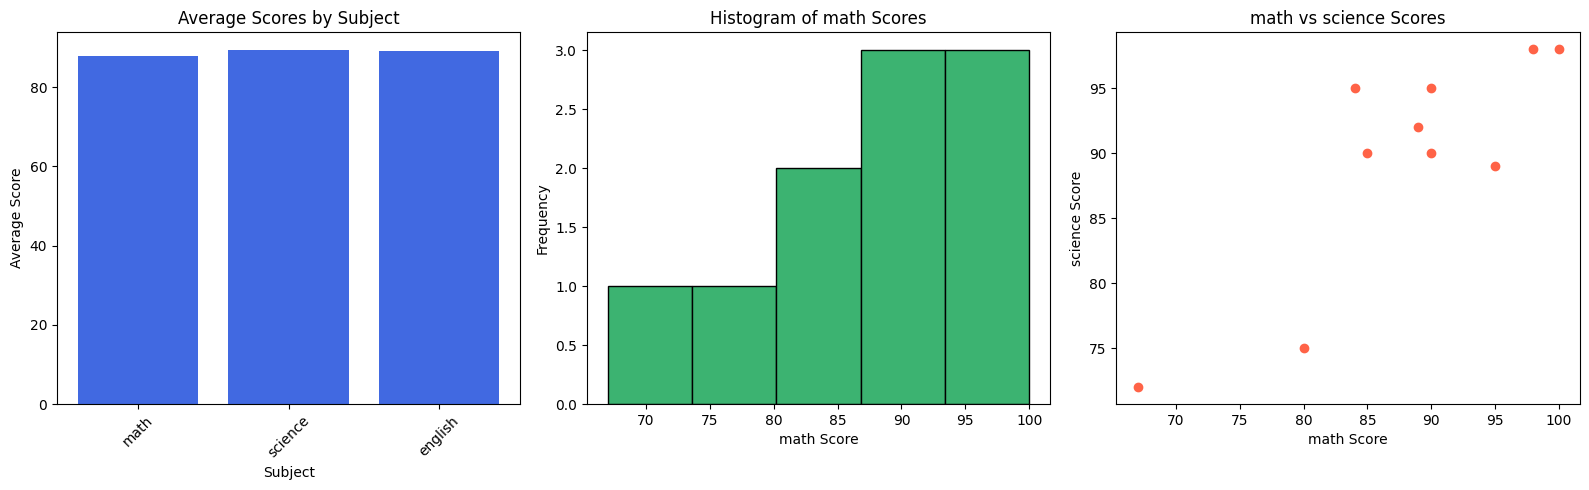

In [131]:
categories = df.columns[2:-1]
values = df[categories].mean()

#make subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

#bar chart of average scores
axs[0].bar(categories, values, color='royalblue')
axs[0].set_title('Average Scores by Subject')
axs[0].set_ylabel('Average Score')
axs[0].set_xlabel('Subject')
axs[0].tick_params(axis='x', rotation=45)  #rotate labels for readability

#histogram of math scores
axs[1].hist(df[categories[0]], bins=5, color='mediumseagreen', edgecolor='black')
axs[1].set_title(f'Histogram of {categories[0]} Scores')
axs[1].set_xlabel(f'{categories[0]} Score')
axs[1].set_ylabel('Frequency')

#scatter plot
axs[2].scatter(df[categories[0]], df[categories[1]], color='tomato')
axs[2].set_title(f'{categories[0]} vs {categories[1]} Scores')
axs[2].set_xlabel(f'{categories[0]} Score')
axs[2].set_ylabel(f'{categories[1]} Score')

plt.tight_layout()
plt.show()

Question 5

In [132]:
#above 85 in Math
math_above_85 = df[df['math'] > 85]
print("Students who scored above 85 in Math:")
print(math_above_85)
print("\n" + "-"*50 + "\n")

#17 years old
age_17 = df[df['age'] == 17]
print("Students who are 17 years old:")
print(age_17)
print("\n" + "-"*50 + "\n")

#above 80 in all subjects
subjects = ['math', 'science', 'english']
above_80_all = df[(df[subjects] > 80).all(axis=1)]
print("Students who scored above 80 in ALL subjects:")
print(above_80_all)
print("\n" + "-"*50 + "\n")

#sort students by total score
sorted_df = df.sort_values(by='total', ascending=False)
print("Students sorted by Total Score (descending):")
print(sorted_df)

Students who scored above 85 in Math:
     name  age  math  science  english  total
0   Alice   15    90       95       82    267
1    Bill   16   100       98       99    297
2  Connor   17    89       92       95    276
3   Derek   16    90       90       89    269
4   Ethan   15    98       98       98    294
6    Greg   15    95       89       90    274

--------------------------------------------------

Students who are 17 years old:
     name  age  math  science  english  total
2  Connor   17    89       92       95    276
8  Icarus   17    84       95       86    265

--------------------------------------------------

Students who scored above 80 in ALL subjects:
      name  age  math  science  english  total
0    Alice   15    90       95       82    267
1     Bill   16   100       98       99    297
2   Connor   17    89       92       95    276
3    Derek   16    90       90       89    269
4    Ethan   15    98       98       98    294
6     Greg   15    95       89       

Question 6

In [133]:
def analyze_subject(df, subject_name):
    #analyze a specific subject's performance
    highest = df[subject_name].max()
    lowest = df[subject_name].min()
    average = df[subject_name].mean()
    above_80 = (df[subject_name] > 80).sum()
    #print results
    print(f"Analysis for {subject_name}:")
    print(f"Highest Score: {highest}")
    print(f"Lowest Score: {lowest}")
    print(f"Average Score: {average:.2f}")
    print(f"Number of Students scoring above 80: {above_80}")
    print("-" * 40)

#compare performance between age groups
def compare_ages(df):
    #ensure total score column exists and if not create it
    subjects = ['math', 'science', 'english']
    if 'Total_Score' not in df.columns:
        df['total'] = df[subjects].sum(axis=1)
    #print average total score for each age
    avg_by_age = df.groupby('age')['total'].mean()
    print("Average Total Score by Age:")
    print(avg_by_age)
    print("-" * 40)


In [134]:
df = pd.read_csv('students.csv')

analyze_subject(df, 'math')
analyze_subject(df, 'science')
analyze_subject(df, 'english')

compare_ages(df)

Analysis for math:
Highest Score: 100
Lowest Score: 67
Average Score: 87.80
Number of Students scoring above 80: 8
----------------------------------------
Analysis for science:
Highest Score: 98
Lowest Score: 72
Average Score: 89.40
Number of Students scoring above 80: 8
----------------------------------------
Analysis for english:
Highest Score: 99
Lowest Score: 70
Average Score: 89.10
Number of Students scoring above 80: 9
----------------------------------------
Average Total Score by Age:
age
15    278.333333
16    268.666667
17    270.500000
18    240.500000
Name: total, dtype: float64
----------------------------------------


Question 7

In [135]:
def get_letter_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'
df = pd.read_csv('students.csv')

#calculate average score across all subjects
subjects = df.columns[2:-1]
df['average_score'] = df[subjects].mean(axis=1)

#determine letter grade for each student
df['letter_grade'] = df['average_score'].apply(get_letter_grade)

#write student report CSV
report_cols = ['name', 'age', 'average_score', 'letter_grade']
df[report_cols].to_csv('student_report.csv', index=False)

#class summary text
total_students = len(df)
class_average = df['average_score'].mean()
grade_counts = df['letter_grade'].value_counts().sort_index()  # Sort by letter grade

with open('class_summary.txt', 'w') as f:
    f.write(f"Total number of students: {total_students}\n")
    f.write(f"Class average score: {class_average:.2f}\n")
    f.write("Number of students in each letter grade category:\n")
    for grade in ['A', 'B', 'C', 'D', 'F']:
        count = grade_counts.get(grade, 0)
        f.write(f"  {grade}: {count}\n")

Question 8

Average Math score by age group:
age
15    94.333333
16    90.000000
17    86.500000
18    76.000000
Name: math, dtype: float64

Count of students in each age group:
age
15    3
16    3
17    2
18    2
Name: math, dtype: int64


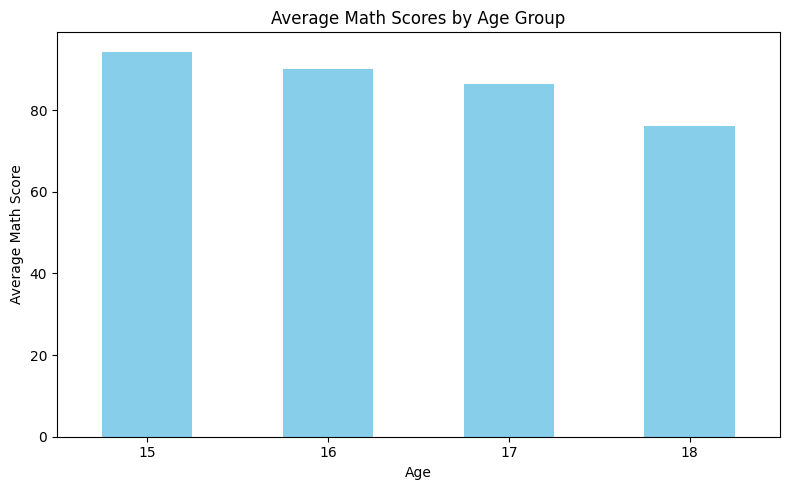


Age group with best Math performance: 15 (Average score: 94.33)


In [136]:
#group by age and calculate average Math score and count of students
math_avg_by_age = df.groupby('age')['math'].mean()
count_by_age = df.groupby('age')['math'].count()

#print results
print("Average Math score by age group:")
print(math_avg_by_age)
print("\nCount of students in each age group:")
print(count_by_age)

#bar chart
plt.figure(figsize=(8,5))
math_avg_by_age.plot(kind='bar', color='skyblue')
plt.title('Average Math Scores by Age Group')
plt.xlabel('Age')
plt.ylabel('Average Math Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# age group with the best math
best_age_group = math_avg_by_age.idxmax()
best_score = math_avg_by_age.max()
print(f"\nAge group with best Math performance: {best_age_group} (Average score: {best_score:.2f})")

ccc

In [137]:
#create messy data and make df
messy_data = {
    'name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Diana'],  # Duplicate 'Alice'
    'math': [85, 90, '', 88, 92],  # Empty string in Math scores
    'age': [16, 17, 16, 16, 18]
}

df = pd.DataFrame(messy_data)

print("Original Data:")
print(df)
print(f"Original shape: {df.shape}")

import numpy as np
#check for duplicates
duplicates = df.duplicated()
print(f"Duplicate rows found: {duplicates.sum()}")

#check for missing/empty values
print("Missing or empty values per column:")
print(df.isnull().sum())
print("Empty strings in 'math':", (df['math'] == '').sum())

#replace empty strings  with nan
df['math'] = df['math'].replace('', np.nan)

#convert math column to float, force errors to nan
df['math'] = pd.to_numeric(df['math'], errors='coerce')

#handle missing values by replacing nan
math_mean = df['math'].mean()
df['math'].fillna(math_mean, inplace=True)

#remove duplicates
df_clean = df.drop_duplicates()

print("\nCleaned Data:")
print(df_clean)
print(f"Cleaned shape: {df_clean.shape}")

#summary
print("\nSummary statistics:")
print(df_clean.describe(include='all'))

Original Data:
      name math  age
0    Alice   85   16
1      Bob   90   17
2  Charlie        16
3    Alice   88   16
4    Diana   92   18
Original shape: (5, 3)
Duplicate rows found: 0
Missing or empty values per column:
name    0
math    0
age     0
dtype: int64
Empty strings in 'math': 1

Cleaned Data:
      name   math  age
0    Alice  85.00   16
1      Bob  90.00   17
2  Charlie  88.75   16
3    Alice  88.00   16
4    Diana  92.00   18
Cleaned shape: (5, 3)

Summary statistics:
         name      math        age
count       5   5.00000   5.000000
unique      4       NaN        NaN
top     Alice       NaN        NaN
freq        2       NaN        NaN
mean      NaN  88.75000  16.600000
std       NaN   2.58602   0.894427
min       NaN  85.00000  16.000000
25%       NaN  88.00000  16.000000
50%       NaN  88.75000  16.000000
75%       NaN  90.00000  17.000000
max       NaN  92.00000  18.000000


/tmp/ipython-input-137-2379037682.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['math'] = df['math'].replace('', np.nan)
/tmp/ipython-input-137-2379037682.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math'].fillna(math_mean, inplace=True)


Question 10

Student Averages:
Alice: 87.67
Bob: 81.67
Charlie: 90.33

Class Average: 86.56
Data saved to gradebook.csv


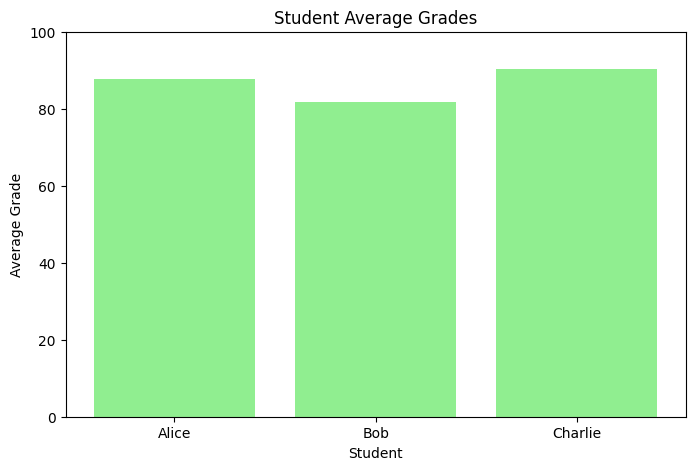

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

class GradeBook:
    def __init__(self):
        self.students = []

    def add_student(self, name, age):
        if any(s['name'] == name for s in self.students):
            print(f"Student '{name}' already exists.")
            return
        self.students.append({'name': name, 'age': age, 'grades': {}})

    def add_grade(self, student_name, subject, grade):
        for student in self.students:
            if student['name'] == student_name:
                student['grades'][subject] = grade
                return
        print(f"Student '{student_name}' not found.")

    def get_student_average(self, student_name):
        for student in self.students:
            if student['name'] == student_name:
                data = student['grades'].values()
                if data:
                    return sum(data) / len(data)
                else:
                    return 0
        print(f"Student '{student_name}' not found.")
        return None

    def get_class_average(self):
        averages = []
        for student in self.students:
            data = student['grades'].values()
            if data:
                averages.append(sum(data) / len(data))
        if averages:
            return sum(averages) / len(averages)
        return 0

    def save_to_file(self, filename):
        data = []
        for s in self.students:
            row = {'Name': s['name'], 'Age': s['age']}
            row.update(s['grades'])
            data.append(row)
        df = pd.DataFrame(data)
        df.to_csv(filename, index=False)
        print(f"Data saved to {filename}")

#test gradebook

gradebook = GradeBook()

#add students
gradebook.add_student('Alice', 16)
gradebook.add_student('Bob', 17)
gradebook.add_student('Charlie', 16)

#add grades for each
subjects = ['Math', 'Science', 'English']

grades_data = {
    'Alice': {'Math': 85, 'Science': 90, 'English': 88},
    'Bob': {'Math': 78, 'Science': 82, 'English': 85},
    'Charlie': {'Math': 92, 'Science': 88, 'English': 91},
}

for student, grades in grades_data.items():
    for subject, grade in grades.items():
        gradebook.add_grade(student, subject, grade)

#print each average
print("Student Averages:")
for student in gradebook.students:
    avg = gradebook.get_student_average(student['name'])
    print(f"{student['name']}: {avg:.2f}")

#print class average
class_avg = gradebook.get_class_average()
print(f"\nClass Average: {class_avg:.2f}")

#save to CSV
gradebook.save_to_file('gradebook.csv')

#bar chart of student averages
names = [s['name'] for s in gradebook.students]
averages = [gradebook.get_student_average(s) for s in names]

plt.figure(figsize=(8,5))
plt.bar(names, averages, color='lightgreen')
plt.title("Student Average Grades")
plt.xlabel("Student")
plt.ylabel("Average Grade")
plt.ylim(0, 100)
plt.show()
